In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import cgs as cgs

#from plotting import plotTools as ptools

using cgs py


In [2]:
shock_par = np.genfromtxt('shock_parameter_study.dat',names=True)
# find unique values for alpha, rps_beta, kh_beta
alpha_unique = np.unique(shock_par['alpha'])
rps_beta_unique = np.unique(shock_par['rps_beta'])
kh_beta_unique = np.sort(np.unique(shock_par['kh_beta']))


77.9121909409 79.0724058075 1.25


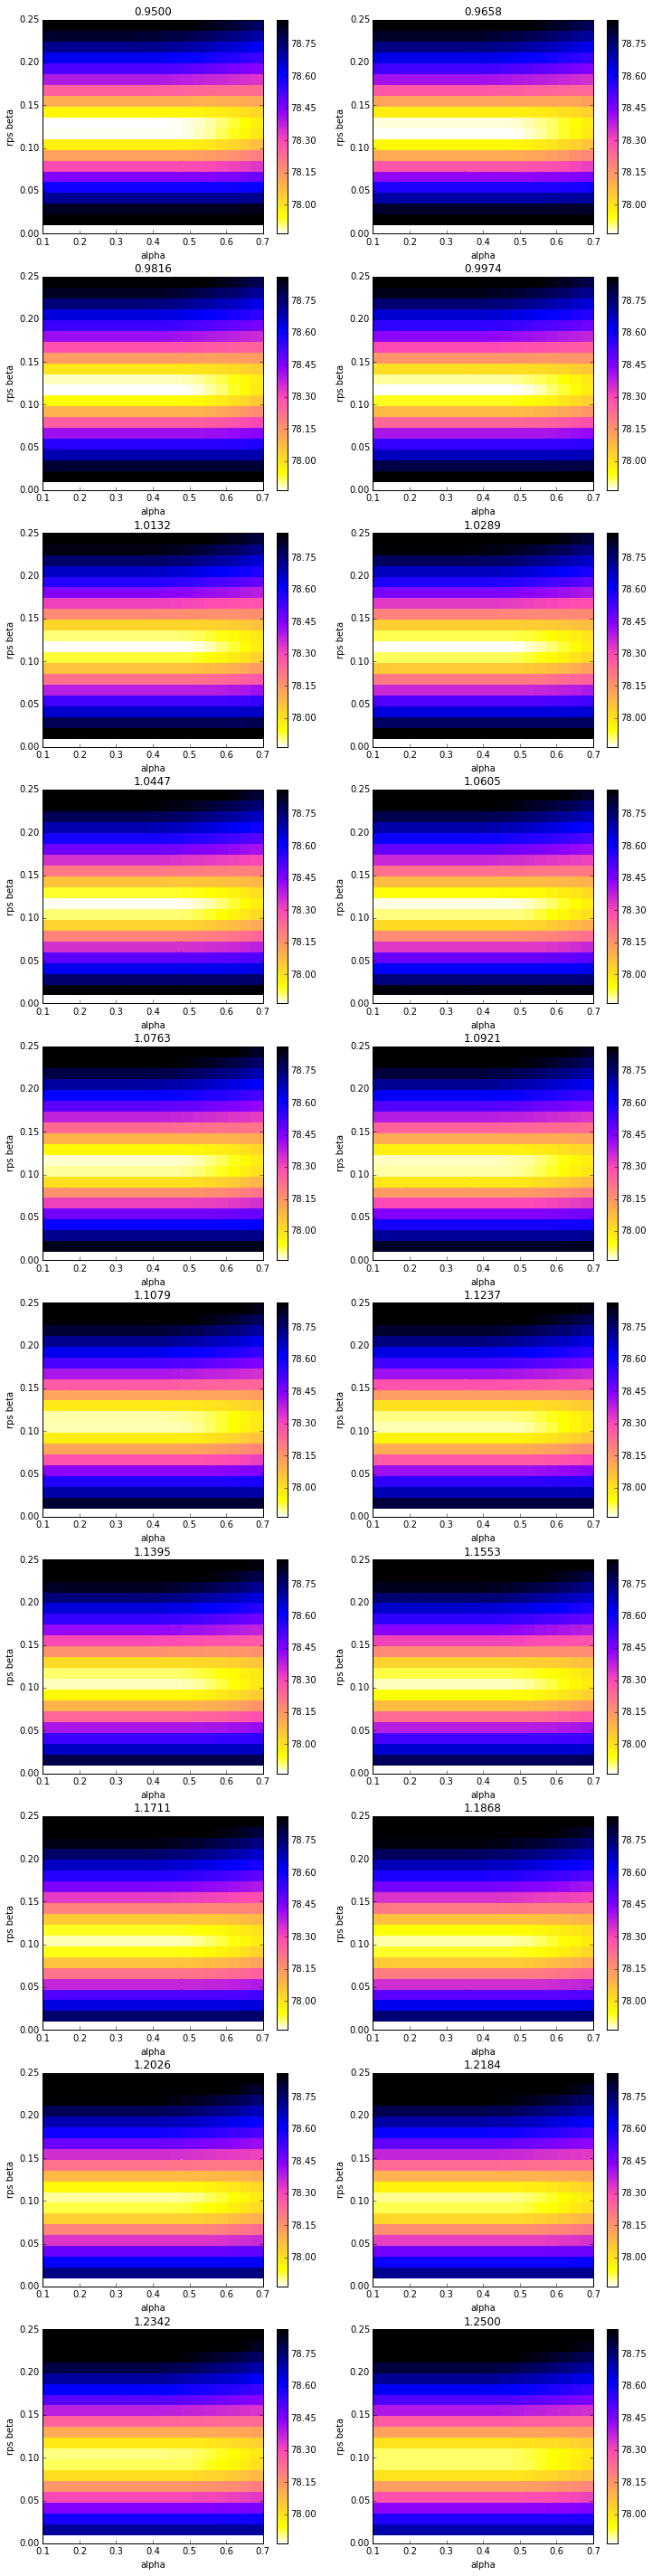

In [6]:
nplot = np.size(kh_beta_unique)
N = nplot

use_logscale = True

vmin = np.min(shock_par['error']); vmax = vmin*2.0
if use_logscale:
    vmin = np.log10(vmin); vmax = vmin + 1.0

ncol  = 2.0
nrows = np.ceil(nplot / ncol)
fig = plt.figure(figsize=[ncol*(5+1),nrows*5])

for i in np.arange(np.size(kh_beta_unique)):
    ax = fig.add_subplot(nrows,ncol,i+1)

    
    selection = shock_par['kh_beta'] == kh_beta_unique[i]
    
    alphas = np.reshape(shock_par['alpha'][selection],(N,N))
    rps_betas = np.reshape(shock_par['rps_beta'][selection],(N,N))
    error = np.reshape(shock_par['error'][selection],(N,N))
    
    if use_logscale:
        error = np.log10(error)

    mappable = ax.pcolormesh(alphas,rps_betas,error,cmap='gnuplot2_r',vmin=vmin,vmax=vmax)
    plt.colorbar(mappable)
    ax.set_xlabel('alpha')
    ax.set_ylabel('rps beta')
    ax.set_title('%.4f'%(kh_beta_unique[i]))
#plt.clim(np.min(error),np.max(error))
print np.min(error),np.max(error), kh_beta_unique[i]